# Beam bending calculator

* Leave *lines 1-6 and 21-23 as they are*; they ensure that all necessary modules are imported and active.

* Whatever code is written to the right of the numeral sign (**#**) is a comment. These comments are not executed, so you can safely ignore or delete them.

The current code reproduces [this example](https://alfredocarella.github.io/simplebendingpractice/examples/example_1.html).

In [1]:
import anvil.server

anvil.server.connect("SXI6DT74Y4LCCKCJI3QXX625-IZEPG6ZJPQR42HBL")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


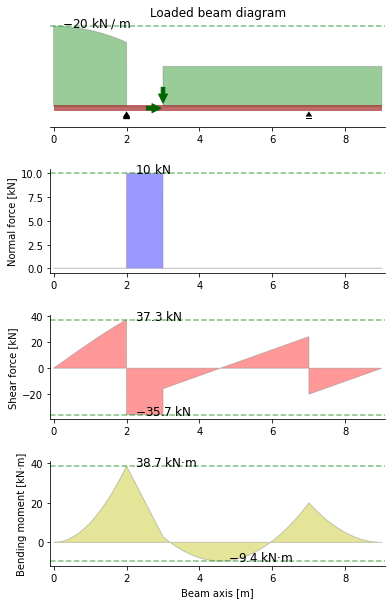

In [5]:


# Initialization (leave this section as it is, unless you know what you are doing)
%matplotlib inline
from beambending import Beam, DistributedLoadH, DistributedLoadV, PointLoadH, PointLoadV, PointTorque, x


# Go on and play around with the values in this section. See what happens!
### ------------------------------------------------------------------------ ###
beam = Beam(9)
beam.pinned_support = 2    # x-coordinate of the pinned support
beam.rolling_support = 7  # x-coordinate of the rolling support
beam.add_loads((
                PointLoadH(10, 3),  # 10kN pointing right, at x=3m
                PointLoadV(-20, 3),  # 20kN downwards, at x=3m
                DistributedLoadV(-10, (3, 9)),  # 10 kN/m, downwards, for 3m <= x <= 9m
                DistributedLoadV(-20 + x**2, (0, 2)),  # variable load, for 0m <= x <= 2m
))
### ------------------------------------------------------------------------ ###


# Output generation (leave this section as it is, unless you know what you are doing)
fig = beam.plot()
fig.savefig("./results.pdf")

Click the link to download [a pdf file with your case results](./results.pdf "Come on and click! You know you want to."). <-- __doesn't work in Google Colab__

You can now go back up and continue to play around choosing different loads, beam lengths and placement of the beam supports.
Add as many loads as you want to the list (but don't forget to put a comma between two loads).

After you have made some changes, run the code cell again to calculate your new results.

When you are comfortable with that, check what happens if you try more interesting expressions for the distributed loads, for example:

```python
DistributedLoadV("2 * x**2 + cos(5)", (0, 3))
```
By the way, a double asterisk is how you write a power in Python: ```"2 * x**2 + cos(5)"``` means $2x^2 + \cos(5)$

**Note:** you can also try to include trigonometric functions, but in this case the whole mathematical expression __must be surrounded by quotation marks__, just as in the example above.